In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile

In [2]:

zip_file_path = '/Users/ALONA/Desktop/Go_IT/HW/Data Science/Data_Science/Lessons/Customer_Purchase_Behavior/archive.zip'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    # List of files in the archive
    print("Contents of the ZIP archive:") 
    for file_info in z.infolist():
        print(file_info.filename)

Contents of the ZIP archive:
customer_purchase_data.csv


In [3]:

csv_file_name = "customer_purchase_data.csv"

with zipfile.ZipFile(zip_file_path, "r") as z: 
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)


print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB
None


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


**Working with duplicates** 

In [5]:
# Check for duplicates
duplicates_exist = df.duplicated().any()
print(f"Are there duplicates in the DataFrame: {duplicates_exist}")

# Подсчет количества дубликатов
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

Are there duplicates in the DataFrame: True
Number of duplicates: 112


In [8]:
duplicates = df[df.duplicated(keep=False)]

# Sort duplicates by all columns
sorted_duplicates = duplicates.sort_values(by=df.columns.tolist())

sorted_duplicates

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1139,18,1,111861.883084,5,2,31.027565,1,3,0
1150,18,1,111861.883084,5,2,31.027565,1,3,0
126,19,1,24590.476142,1,3,14.971058,0,5,0
774,19,1,24590.476142,1,3,14.971058,0,5,0
314,20,0,44443.215500,9,2,11.463730,1,0,0
...,...,...,...,...,...,...,...,...,...
961,70,0,119425.274117,4,3,45.355881,0,5,0
441,70,1,44197.666708,4,4,16.593685,1,4,0
749,70,1,44197.666708,4,4,16.593685,1,4,0
541,70,1,67880.238966,2,0,47.122010,0,2,0


In this dataframe, there are 112 duplicates. To provide clearer information, these duplicates are removed from the working dataframe.

In [9]:
df = df.drop_duplicates()

In [10]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

# Training on the output of normalized data

In [11]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [40]:
def plot_confusion_matrices(y_true_list, y_pred_list, model_names, overall_title="Confusion Matrices"):
    # Перевірка довжини списків
    assert len(y_true_list) == len(y_pred_list) == len(model_names), "Lists must have the same length"

    n = len(y_true_list)  # Кількість матриць плутанини
    fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))  # Створення підграфіків в одному рядку

    for i in range(n):
        # Обчислення матриці плутанини
        conf_matrix = confusion_matrix(y_true_list[i], y_pred_list[i])

        # Візуалізація матриці плутанини
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
                    ax=axes[i])
        axes[i].set_title(model_names[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')

    # Додавання загального заголовка
    fig.suptitle(overall_title, fontsize=16)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Підлаштування підграфіків і заголовка
    plt.show()


## Baseline models

In [14]:
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

In [18]:
y_true_list_base = [] 
y_pred_list_base = [] 
model_names_base = []

In [12]:
all_features = ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']

scaler = StandardScaler()

df_copy = df.copy()
df_copy[all_features] = scaler.fit_transform(df_copy[all_features])

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    df_copy[all_features], 
    df_copy["PurchaseStatus"],
    test_size=0.3,
    stratify=df_copy["PurchaseStatus"]
    )

In [20]:
rf_model_b = RandomForestClassifier()
rf_model_b.fit(X_train_b, y_train_b)
y_pred_rf_b = rf_model_b.predict(X_test_b)
y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_rf_b)
model_names_base.append("Random Forest Base Model")
report_rf_b = classification_report(y_test_b, y_pred_rf_b, output_dict=True)

print("Random Forest Base Model")
print(classification_report(y_test_b, y_pred_rf_b, output_dict=True))

rf_b_accuracy = accuracy_score(y_test_b, y_pred_rf_b)
print("Model accuracy:", rf_b_accuracy)

# Extract the average values ​​for all classes
precision_rf_b = report_rf_b['macro avg']['precision']
recall_rf_b = report_rf_b['macro avg']['recall']
f1_score_rf_b = report_rf_b['macro avg']['f1-score']

# results to the DataFrame
results_rf_b = pd.DataFrame([{
    "Model": "Random Forest Base Model",
    "Accuracy": rf_b_accuracy,
    "Precision": precision_rf_b,
    "Recall": recall_rf_b,
    "F1-Score": f1_score_rf_b
    }])

# Merge the results into the main DataFrame
results_df = pd.concat([results_df, results_rf_b], ignore_index=True)

Random Forest Base Model
{'0': {'precision': 0.9043478260869565, 'recall': 0.9369369369369369, 'f1-score': 0.9203539823008849, 'support': 222.0}, '1': {'precision': 0.9251336898395722, 'recall': 0.8871794871794871, 'f1-score': 0.9057591623036649, 'support': 195.0}, 'accuracy': 0.9136690647482014, 'macro avg': {'precision': 0.9147407579632644, 'recall': 0.912058212058212, 'f1-score': 0.913056572302275, 'support': 417.0}, 'weighted avg': {'precision': 0.9140678343165971, 'recall': 0.9136690647482014, 'f1-score': 0.9135290664748468, 'support': 417.0}}
Model accuracy: 0.9136690647482014


/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_23421/308126709.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, results_rf_b], ignore_index=True)


In [21]:
gb_model_b = GradientBoostingClassifier()
gb_model_b.fit(X_train_b, y_train_b)
y_pred_gb_b = gb_model_b.predict(X_test_b)
y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_gb_b)
model_names_base.append("Gradient Boosting Base Model")
report_gb_b = classification_report(y_test_b, y_pred_gb_b, output_dict=True)

print("Gradient Boosting Base Model")
print(report_gb_b)

gb_b_accuracy = accuracy_score(y_test_b, y_pred_gb_b)
print("Model accuracy:", gb_b_accuracy)

# Extract the average values ​​for all classes
precision_gb_b = report_gb_b['macro avg']['precision']
recall_gb_b = report_gb_b['macro avg']['recall']
f1_score_gb_b = report_gb_b['macro avg']['f1-score']

# add results to the DataFrame
results_gb_b = pd.DataFrame([{
    "Model": "Gradient Boosting Base Model",
    "Accuracy": gb_b_accuracy,
    "Precision": precision_gb_b,
    "Recall": recall_gb_b,
    "F1-Score": f1_score_gb_b
    }])

# Merge the results into the main DataFrame
results_df = pd.concat([results_df, results_gb_b], ignore_index=True)

Gradient Boosting Base Model
{'0': {'precision': 0.9035087719298246, 'recall': 0.9279279279279279, 'f1-score': 0.9155555555555556, 'support': 222.0}, '1': {'precision': 0.9153439153439153, 'recall': 0.8871794871794871, 'f1-score': 0.9010416666666666, 'support': 195.0}, 'accuracy': 0.9088729016786571, 'macro avg': {'precision': 0.9094263436368699, 'recall': 0.9075537075537075, 'f1-score': 0.9082986111111111, 'support': 417.0}, 'weighted avg': {'precision': 0.9090431915119533, 'recall': 0.9088729016786571, 'f1-score': 0.9087684852118305, 'support': 417.0}}
Model accuracy: 0.9088729016786571


In [22]:
svm_model_b = SVC()
svm_model_b.fit(X_train_b, y_train_b)
y_pred_svm_b = svm_model_b.predict(X_test_b)
y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_svm_b)
model_names_base.append("SVM Base Model")
report_svm_b = classification_report(y_test_b, y_pred_svm_b, output_dict=True)

print("SVM Base Model")
print(report_svm_b)

svm_b_accuracy = accuracy_score(y_test_b, y_pred_svm_b)
print("Model accuracy SVM:", svm_b_accuracy)

# Extract the average values ​​for all classes
precision_svm_b = report_svm_b['macro avg']['precision']
recall_svm_b = report_svm_b['macro avg']['recall']
f1_score_svm_b = report_svm_b['macro avg']['f1-score']

# add results to the DataFrame
results_svm_b = pd.DataFrame([{
    "Model": "SVM Base Model",
    "Accuracy": svm_b_accuracy,
    "Precision": precision_svm_b,
    "Recall": recall_svm_b,
    "F1-Score": f1_score_svm_b
    }])

# Merge the results into the main DataFrame
results_df = pd.concat([results_df, results_svm_b], ignore_index=True)

SVM Base Model
{'0': {'precision': 0.8454935622317596, 'recall': 0.8873873873873874, 'f1-score': 0.865934065934066, 'support': 222.0}, '1': {'precision': 0.8641304347826086, 'recall': 0.8153846153846154, 'f1-score': 0.8390501319261213, 'support': 195.0}, 'accuracy': 0.8537170263788969, 'macro avg': {'precision': 0.8548119985071841, 'recall': 0.8513860013860014, 'f1-score': 0.8524920989300937, 'support': 417.0}, 'weighted avg': {'precision': 0.8542086465181278, 'recall': 0.8537170263788969, 'f1-score': 0.8533624421174013, 'support': 417.0}}
Model accuracy SVM: 0.8537170263788969


In [23]:
lr_model_b = LogisticRegression()
lr_model_b.fit(X_train_b, y_train_b)
y_pred_lr_b = lr_model_b.predict(X_test_b)
y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_lr_b)
model_names_base.append("Logistic RegressionBase Model")
report_lr_b = classification_report(y_test_b, y_pred_lr_b, output_dict=True)

print("Logistic RegressionBase Model")
print(report_lr_b)

lr_b_accuracy = accuracy_score(y_test_b, y_pred_lr_b)
print("Model accuracy:", lr_b_accuracy)

# Extract the average values ​​for all classes
precision_lr_b = report_lr_b['macro avg']['precision']
recall_lr_b = report_lr_b['macro avg']['recall']
f1_score_lr_b = report_lr_b['macro avg']['f1-score']

# add results to the DataFrame
results_lr_b = pd.DataFrame([{
    "Model": "Logistic RegressionBase Model",
    "Accuracy": lr_b_accuracy,
    "Precision": precision_lr_b,
    "Recall": recall_lr_b,
    "F1-Score": f1_score_lr_b
    }])

# Merge the results into the main DataFrame
results_df = pd.concat([results_df, results_lr_b], ignore_index=True)

Logistic RegressionBase Model
{'0': {'precision': 0.7982456140350878, 'recall': 0.8198198198198198, 'f1-score': 0.8088888888888889, 'support': 222.0}, '1': {'precision': 0.7883597883597884, 'recall': 0.764102564102564, 'f1-score': 0.7760416666666666, 'support': 195.0}, 'accuracy': 0.7937649880095923, 'macro avg': {'precision': 0.7933027011974381, 'recall': 0.791961191961192, 'f1-score': 0.7924652777777778, 'support': 417.0}, 'weighted avg': {'precision': 0.7936227459135449, 'recall': 0.7937649880095923, 'f1-score': 0.7935286770583533, 'support': 417.0}}
Model accuracy: 0.7937649880095923


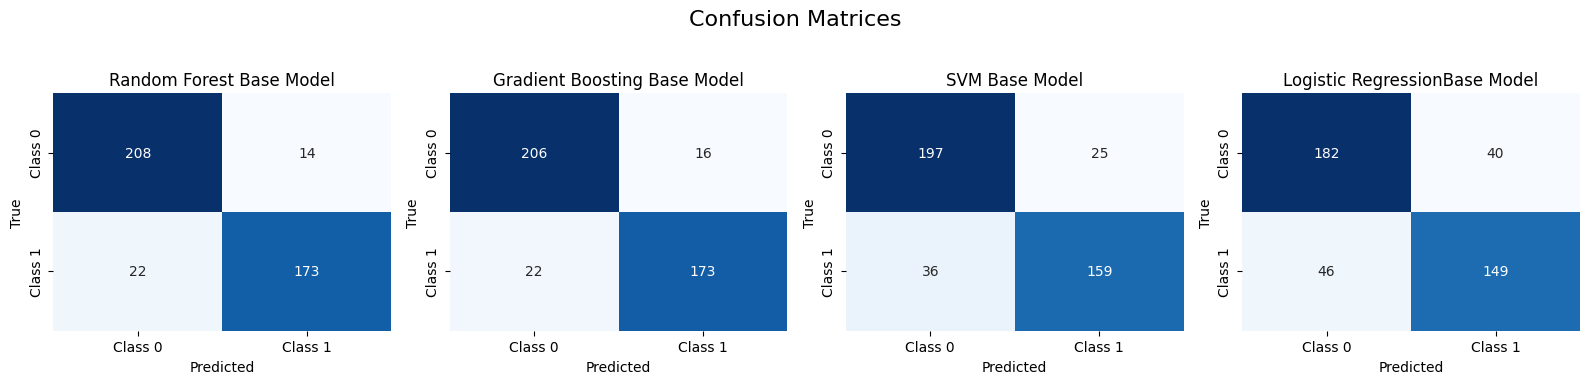

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest Base Model,0.913669,0.914741,0.912058,0.913057
1,Gradient Boosting Base Model,0.908873,0.909426,0.907554,0.908299
2,SVM Base Model,0.853717,0.854812,0.851386,0.852492
3,Logistic RegressionBase Model,0.793765,0.793303,0.791961,0.792465


In [41]:
# Visualization of confusion matrices
plot_confusion_matrices(y_true_list_base, y_pred_list_base, model_names_base)
results_df

# Correlation

### Calculating Correlation

In [25]:

correlation_matrix = df.corr()

# correlation with PurchaseStatus
purchase_status_corr = correlation_matrix['PurchaseStatus'].sort_values(ascending=False)
purchase_status_corr = purchase_status_corr.drop('PurchaseStatus')  # delate correlation with yourself


print("Correlation of features with PurchaseStatus:")
print(purchase_status_corr)

Correlation of features with PurchaseStatus:
LoyaltyProgram        0.318059
DiscountsAvailed      0.296606
TimeSpentOnWebsite    0.282127
NumberOfPurchases     0.219116
AnnualIncome          0.191218
ProductCategory       0.014349
Gender                0.008856
Age                  -0.253598
Name: PurchaseStatus, dtype: float64


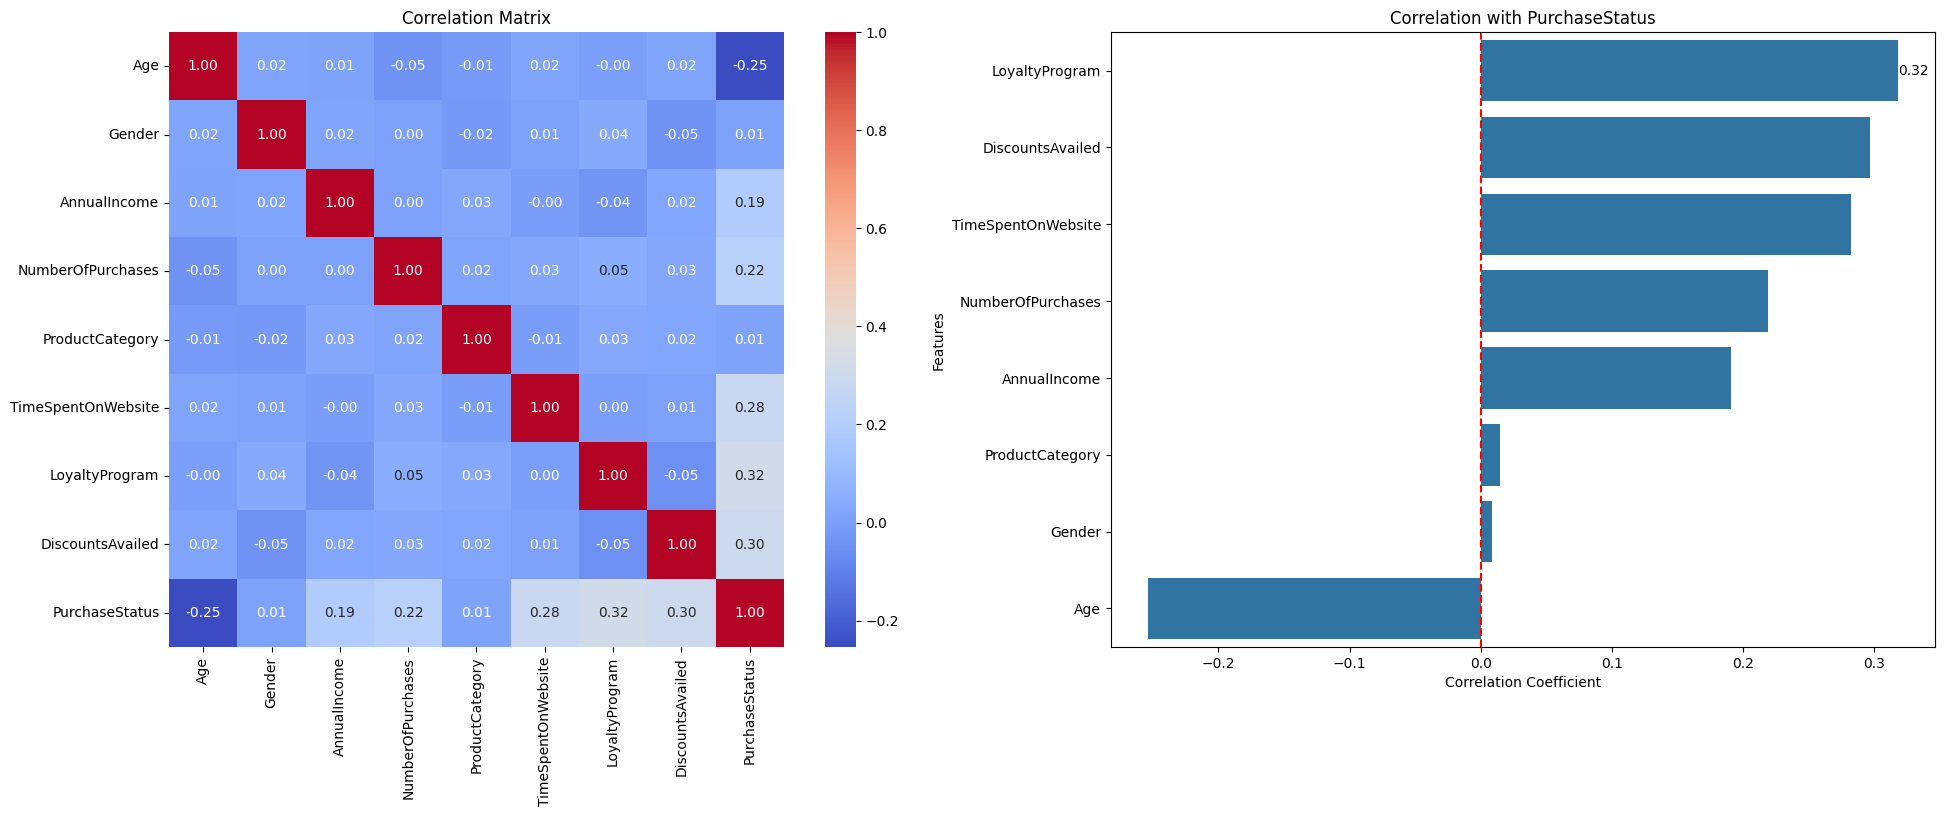

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax1)
ax1.set_title("Correlation Matrix")

sns.barplot(x=purchase_status_corr.values, y=purchase_status_corr.index, orient="h", ax=ax2)
ax2.set_title("Correlation with PurchaseStatus")
ax2.set_xlabel("Correlation Coefficient")
ax2.set_ylabel("Features")


ax2.axvline(x=0, color="r", linestyle="--")

for i, v in enumerate(purchase_status_corr.values):
    ax2.text(v, i, f"{v:.2f}", va="center")

    plt.tight_layout()
    plt.show()

### Analysis of feature correlations with the target variable PurchaseStatus:

- **LoyaltyProgram (0.310838):**
    - Strongest positive correlation.
    - Indicates that participation in the loyalty program has the greatest positive impact on the likelihood of purchase.

- **DiscountsAvailed (0.303297):**
    - Second strongest positive correlation.
    - Shows that using discounts also significantly increases the likelihood of purchase.

- **TimeSpentOnWebsite (0.277112):**
    - Moderate positive correlation.
    - The more time a customer spends on the website, the higher the probability of purchase.

- **NumberOfPurchases (0.222691):**
    - Medium strength positive correlation.
    - Indicates that customers who have made more purchases in the past are more likely to make a purchase again.

- **AnnualIncome (0.188214):**
    - Weak positive correlation.
    - Shows that annual income has some positive influence on the likelihood of purchase, but not very strong.

- **ProductCategory (0.007346) and Gender (0.002627):**
    - Very weak correlation, close to zero.
    - These features have almost no impact on the likelihood of purchase.

- **Age (-0.255747):**
    - Moderate negative correlation.
    - Indicates that younger customers are more likely to make purchases than older ones.

**Conclusions and recommendations:**

- Loyalty program and discounts are the most effective factors in increasing the likelihood of purchase. It is recommended to strengthen these aspects of the marketing strategy.
- Time spent on the website is also important. It's worth working on improving the user experience and increasing the time users spend on the site.
- The number of previous purchases affects future purchases. Strategies should be developed to encourage repeat purchases.
- Age has an inverse correlation. Consider targeting marketing campaigns to a younger audience or develop special offers to attract the older age group.
- Gender and product category have little effect on the likelihood of purchase. This may mean that your products are equally attractive to different genders and categories.
- Annual income has a weak influence. It might be worth considering other factors when segmenting customers.


## Models taking into account correlation

In [34]:
results_corr = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

y_true_list_corr = [] 
y_pred_list_corr = [] 
model_names_corr = []

In [29]:
features = ['Age', 'NumberOfPurchases', 'TimeSpentOnWebsite',
            'LoyaltyProgram', 'DiscountsAvailed', 'AnnualIncome']

features_for_drop = ['Gender', 'ProductCategory']


ndata = df.copy()
ndata = ndata.drop(columns=features_for_drop)

ndata[features] = scaler.fit_transform(ndata[features])

X_train, X_test, y_train, y_test = train_test_split(
    ndata[features],
    ndata['PurchaseStatus'],
    test_size=0.3,
    stratify=ndata['PurchaseStatus']
)

In [35]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_rf)
model_names_corr.append("Random Forest with Correlation model")
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

print("Random Forest with Correlation model")
print(classification_report(y_test, y_pred_rf))

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Model accuracy:", rf_accuracy)

# Extract the average values ​​for all classes
precision_rf = report_rf['macro avg']['precision']
recall_rf = report_rf['macro avg']['recall']
f1_score_rf = report_rf['macro avg']['f1-score']

# results to the DataFrame
results_rf = pd.DataFrame([{
    "Model": "Random Forest with Correlation model",
    "Accuracy": rf_accuracy,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-Score": f1_score_rf
    }])

# Merge the results into the main DataFrame
results_corr = pd.concat([results_corr, results_rf], ignore_index=True)

Random Forest with Correlation model
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       222
           1       0.93      0.95      0.94       195

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417

Model accuracy: 0.9400479616306955


/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_23421/3341676959.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_corr = pd.concat([results_corr, results_rf], ignore_index=True)


In [36]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_gb)
model_names_corr.append("Gradient Boosting with Correlation model")
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)

print("Gradient Boosting with Correlation model")
print(classification_report(y_test, y_pred_gb))

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Model accuracy:", gb_accuracy)

# Extract the average values ​​for all classes
precision_gb = report_gb['macro avg']['precision']
recall_gb = report_gb['macro avg']['recall']
f1_score_gb = report_gb['macro avg']['f1-score']

# results to the DataFrame
results_gb = pd.DataFrame([{
    "Model": "Gradient Boosting with Correlation model",
    "Accuracy": gb_accuracy,
    "Precision": precision_gb,
    "Recall": recall_gb,
    "F1-Score": f1_score_gb
    }])

# Merge the results into the main DataFrame
results_corr = pd.concat([results_corr, results_gb], ignore_index=True)

Gradient Boosting with Correlation model
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       222
           1       0.88      0.94      0.91       195

    accuracy                           0.91       417
   macro avg       0.91      0.91      0.91       417
weighted avg       0.91      0.91      0.91       417

Model accuracy Gradient Boosting: 0.9112709832134293


In [37]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_svm)
model_names_corr.append("SVM with Correlation model")
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

print("SVM with Correlation model")
print(classification_report(y_test, y_pred_svm))

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Model accuracy:", svm_accuracy)

# Extract the average values ​​for all classes
precision_svm = report_svm['macro avg']['precision']
recall_svm = report_svm['macro avg']['recall']
f1_score_svm = report_svm['macro avg']['f1-score']

# results to the DataFrame
results_svm = pd.DataFrame([{
    "Model": "SVM with Correlation model",
    "Accuracy": svm_accuracy,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1-Score": f1_score_svm
    }])

# Merge the results into the main DataFrame
results_corr = pd.concat([results_corr, results_svm], ignore_index=True)

SVM with Correlation model
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       222
           1       0.86      0.86      0.86       195

    accuracy                           0.87       417
   macro avg       0.87      0.87      0.87       417
weighted avg       0.87      0.87      0.87       417

Model accuracy: 0.8705035971223022


In [38]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_lr)
model_names_corr.append("Logistic Regression with Correlation model")
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

print("Logistic Regression with Correlation model")
print(classification_report(y_test, y_pred_lr))

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Model accuracy:", lr_accuracy)

# Extract the average values ​​for all classes
precision_lr = report_lr['macro avg']['precision']
recall_lr = report_lr['macro avg']['recall']
f1_score_lr = report_lr['macro avg']['f1-score']

# results to the DataFrame
results_lr = pd.DataFrame([{
    "Model": "Logistic Regression with Correlation model",
    "Accuracy": lr_accuracy,
    "Precision": precision_lr,
    "Recall": recall_lr,
    "F1-Score": f1_score_lr
    }])

# Merge the results into the main DataFrame
results_corr = pd.concat([results_corr, results_lr], ignore_index=True)

Logistic Regression with Correlation model
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       222
           1       0.78      0.80      0.79       195

    accuracy                           0.80       417
   macro avg       0.80      0.80      0.80       417
weighted avg       0.80      0.80      0.80       417

Model accuracy: 0.8009592326139089


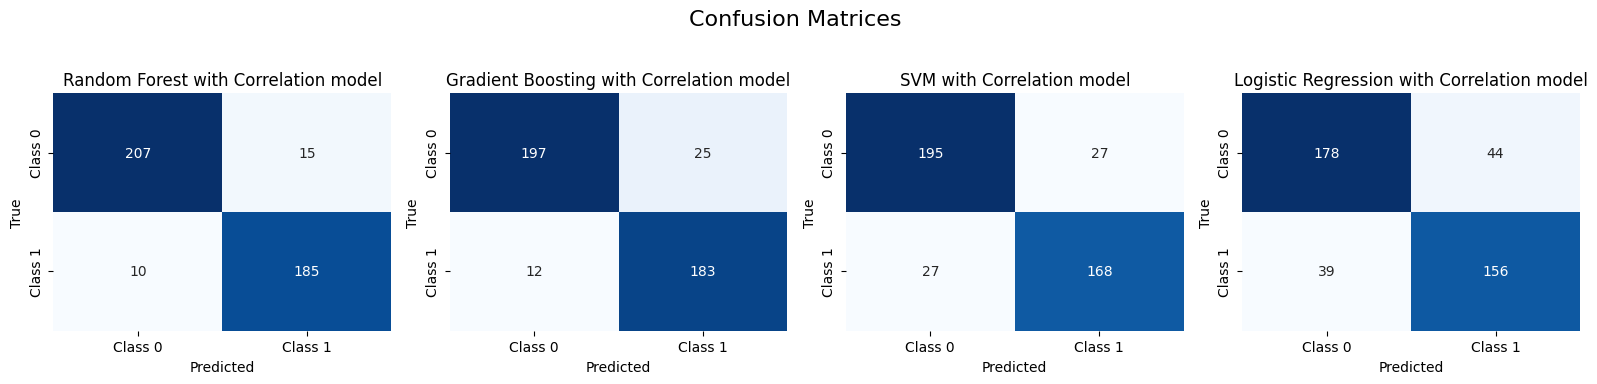

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest with Correlation model,0.940048,0.939459,0.940575,0.939881
1,Gradient Boosting with Correlation model,0.911271,0.911196,0.912924,0.911171
2,SVM with Correlation model,0.870504,0.869958,0.869958,0.869958
3,Logistic Regression with Correlation model,0.800959,0.800138,0.800901,0.800404


In [42]:
plot_confusion_matrices(y_true_list_corr, y_pred_list_corr, model_names_corr)
results_corr

# Results



### Confusion matrices



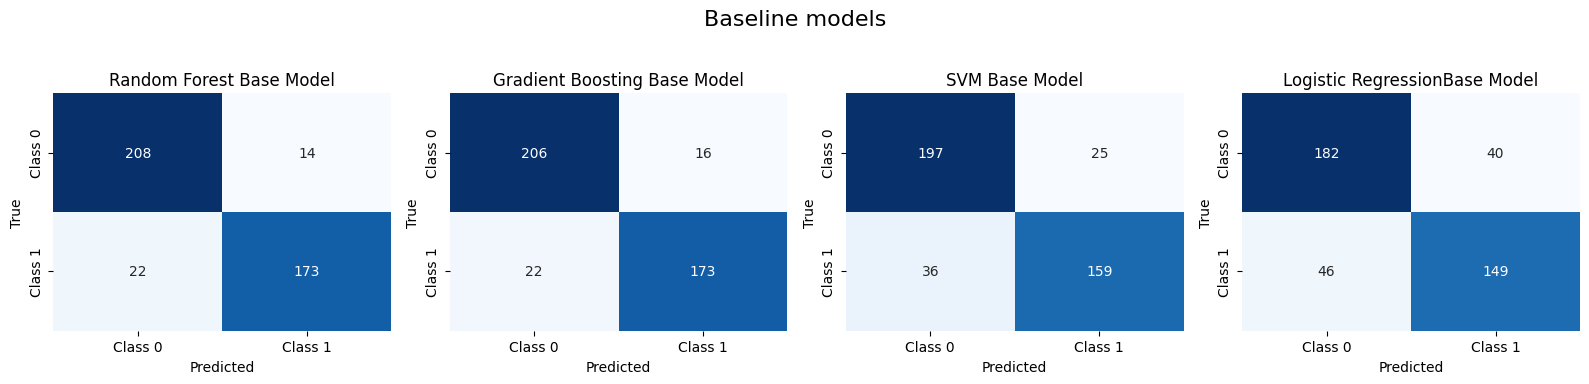

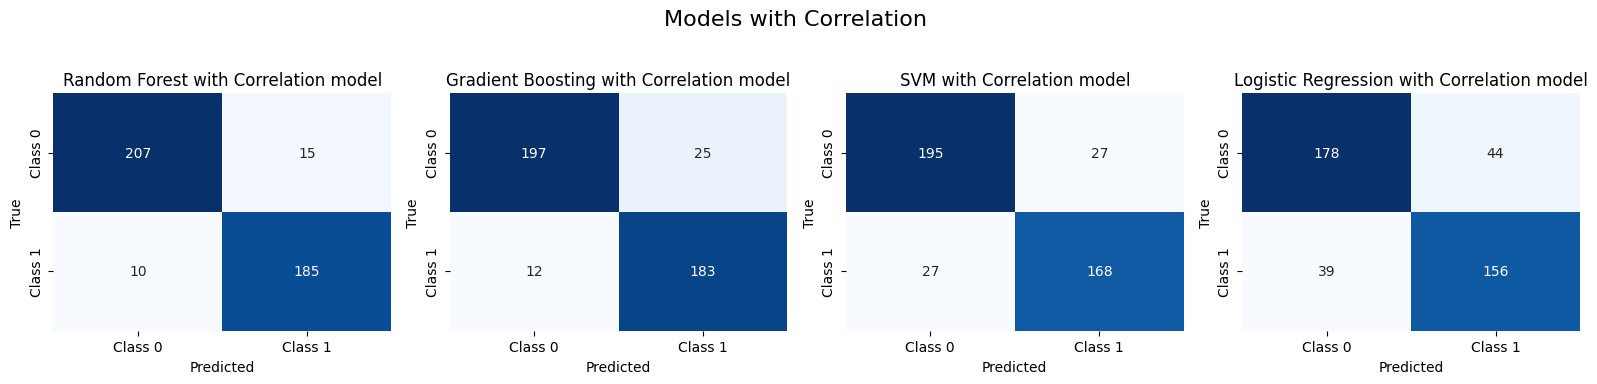

In [45]:
plot_confusion_matrices(y_true_list_base, y_pred_list_base, model_names_base, overall_title="Baseline models")
plot_confusion_matrices(y_true_list_corr, y_pred_list_corr, model_names_corr, overall_title="Models with Correlation")

### Classification Performance Summary

In [44]:
print(results_df)
print(results_corr)

                           Model  Accuracy  Precision    Recall  F1-Score
0       Random Forest Base Model  0.913669   0.914741  0.912058  0.913057
1   Gradient Boosting Base Model  0.908873   0.909426  0.907554  0.908299
2                 SVM Base Model  0.853717   0.854812  0.851386  0.852492
3  Logistic RegressionBase Model  0.793765   0.793303  0.791961  0.792465
                                        Model  Accuracy  Precision    Recall  \
0        Random Forest with Correlation model  0.940048   0.939459  0.940575   
1    Gradient Boosting with Correlation model  0.911271   0.911196  0.912924   
2                  SVM with Correlation model  0.870504   0.869958  0.869958   
3  Logistic Regression with Correlation model  0.800959   0.800138  0.800901   

   F1-Score  
0  0.939881  
1  0.911171  
2  0.869958  
3  0.800404  


In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[207,  15],
       [ 10, 185]])

## Висновок

На основі результатів дослідження, представлених у таблиці, можна зробити наступні висновки:

### Продуктивність моделей без урахування кореляції:
- **Random Forest Base Model** показала найкращу продуктивність серед базових моделей з точністю 91.37%, а також високими значеннями precision, recall і F1-score. Це свідчить про її здатність добре узагальнювати дані.
- **Gradient Boosting Base Model** також показала хорошу продуктивність з точністю 90.89%, трохи поступаючись Random Forest.
- **SVM Base Model** і **Logistic Regression Base Model** продемонстрували нижчу точність, 85.37% і 79.38% відповідно, що вказує на їх меншу ефективність у даному контексті.

### Продуктивність моделей з урахуванням кореляції:
- **Random Forest with Correlation model** показала покращення продуктивності, досягнувши точності 94.00%. Це свідчить про те, що врахування кореляції ознак може значно підвищити ефективність моделі.
- **Gradient Boosting with Correlation model** також покращила свої показники, досягнувши точності 91.13%.
- **SVM with Correlation model** і **Logistic Regression with Correlation model** показали невеликі покращення, але їх точність залишилася нижчою, ніж у Random Forest і Gradient Boosting.

### Порівняння моделей:
- **Random Forest**, як у базовій версії, так і з урахуванням кореляції, постійно перевершує інші моделі за точністю та балансом між precision, recall і F1-score.
- Врахування кореляції ознак особливо корисно для Random Forest, що призводить до значного збільшення точності та інших метрик.

### Матриця помилок:
- **Random Forest with Correlation model** продемонструвала найменший показник помилок, з матрицею помилок `[[207, 15], [10, 185]]`. Це вказує на високу точність моделі в класифікації обох класів і мінімізацію хибних спрацьовувань і пропусків.

## Підсумок
На основі отриманих результатів рекомендується використовувати **Random Forest with Correlation model** для задач прогнозування, оскільки вона демонструє найвищу точність і збалансованість метрик.


# Improving the results of the best model

## Hyperparameter Optimization
Using hyperparameter optimization methods such as Grid Search or Random Search can help find the best hyperparameter values ​​for a model.


Використання методів оптимізації гіперпараметрів, таких як пошук у сітці або випадковий пошук, може допомогти знайти найкращі значення гіперпараметрів для моделі.

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier()

results_best = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
# add Random Forest with Correlation model
results_best = pd.concat([results_best, results_rf], ignore_index=True)


y_true_list_best = [] 
y_pred_list_best = [] 
model_names_best = []


/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_23421/1768791953.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_best = pd.concat([results_best, results_rf], ignore_index=True)


### Grid Search

In [61]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

rf_model_gs = grid_search.best_estimator_
y_pred_gs = rf_model_gs.predict(X_test)
y_true_list_best.append(y_test)
y_pred_list_best.append(y_pred_gs)
model_names_best.append("Random Forest using Grid Search")
report_rf_gs = classification_report(y_test, y_pred_gs, output_dict=True)

print("Random Forest with Correlation model using Grid Search")
print(report_rf_gs)

accuracy_rf_gs = accuracy_score(y_test, y_pred_gs)
print("Accuracy:", accuracy_rf_gs)

# Extract the average values ​​for all classes
precision_rf_gs = report_rf_gs['macro avg']['precision']
recall_rf_gs = report_rf_gs['macro avg']['recall']
f1_score_rf_gs = report_rf_gs['macro avg']['f1-score']

# results to the DataFrame
results_rf_gs = pd.DataFrame([{
    "Model": "Random Forest using Grid Search",
    "Accuracy": accuracy_rf_gs,
    "Precision": precision_rf_gs,
    "Recall": recall_rf_gs,
    "F1-Score": f1_score_rf_gs
    }])

# Merge the results into the main DataFrame
results_best = pd.concat([results_best, results_rf_gs], ignore_index=True)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest with Correlation model using Grid Search
{'0': {'precision': 0.9534883720930233, 'recall': 0.9234234234234234, 'f1-score': 0.9382151029748284, 'support': 222.0}, '1': {'precision': 0.9158415841584159, 'recall': 0.9487179487179487, 'f1-score': 0.9319899244332494, 'support': 195.0}, 'accuracy': 0.935251798561151, 'macro avg': {'precision': 0.9346649781257196, 'recall': 0.936070686070686, 'f1-score': 0.9351025137040389, 'support': 417.0}, 'weighted avg': {'precision': 0.9358837590300774, 'recall': 0.935251798561151, 'f1-score': 0.9353040482611402, 'support': 417.0}}
Accuracy: 0.935251798561151


### Random Search

In [62]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)


print("Best parameters found: ", random_search.best_params_)

rf_model_rs = random_search.best_estimator_
y_pred_rf_rs = rf_model_rs.predict(X_test)
y_true_list_best.append(y_test)
y_pred_list_best.append(y_pred_rf_rs)
model_names_best.append("Random Forest using Random Search")
report_rf_rs = classification_report(y_test, y_pred_rf_rs, output_dict=True)

print("Random Forest using Random Search")
print(report_rf_rs)

accuracy_rf_rs = accuracy_score(y_test, y_pred_rf_rs)
print("Accuracy:", accuracy_rf_rs)

# Extract the average values ​​for all classes
precision_rf_rs = report_rf_rs['macro avg']['precision']
recall_rf_rs = report_rf_rs['macro avg']['recall']
f1_score_rf_rs = report_rf_rs['macro avg']['f1-score']

# results to the DataFrame
results_rf_rs = pd.DataFrame([{
    "Model": "Random Forest using Random Search",
    "Accuracy": accuracy_rf_rs,
    "Precision": precision_rf_rs,
    "Recall": recall_rf_rs,
    "F1-Score": f1_score_rf_rs
    }])

# Merge the results into the main DataFrame
results_best = pd.concat([results_best, results_rf_rs], ignore_index=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=

## Ensemble methods

**Ensemble methods** are machine learning techniques that combine the predictions of multiple models to achieve more accurate and stable results. The main ideas of ensembles are to reduce the likelihood of overfitting and to enhance the generalization ability of the model.

There are several popular ensemble methods, including Bagging and Boosting.

**Bagging, or Bootstrap Aggregating,** is an ensemble method that improves the stability and accuracy of machine learning algorithms. The main idea of Bagging is as follows:
- **Bootstrap Samples**: Several subsets (bootstrap samples) are created from the original dataset by random sampling with replacement. This means that some observations may appear multiple times in one subset, while others may be absent.
- **Training Base Models**: A separate model (e.g., decision tree or random forest) is trained on each subset.
- **Aggregation of Predictions**: The predictions of all models are combined by averaging (for regression) or voting (for classification).

### Bagging

In [63]:

from sklearn.ensemble import BaggingClassifier


bagging_model = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_rf_bg = bagging_model.predict(X_test)
y_true_list_best.append(y_test)
y_pred_list_best.append(y_pred_rf_bg)
model_names_best.append("Random Forest using Bagging")
report_rf_bg = classification_report(y_test, y_pred_rf_bg, output_dict=True)

print("Random Forest using Bagging")
print(report_rf_bg)

accuracy_rf_bg = accuracy_score(y_test, y_pred_rf_bg)
print("Accuracy:", accuracy_rf_bg)

# Extract the average values ​​for all classes
precision_rf_bg = report_rf_bg['macro avg']['precision']
recall_rf_bg = report_rf_bg['macro avg']['recall']
f1_score_rf_bg = report_rf_bg['macro avg']['f1-score']

# results to the DataFrame
results_rf_bg = pd.DataFrame([{
    "Model": "Random Forest using Bagging",
    "Accuracy": accuracy_rf_bg,
    "Precision": precision_rf_bg,
    "Recall": recall_rf_bg,
    "F1-Score": f1_score_rf_bg
    }])

# Merge the results into the main DataFrame
results_best = pd.concat([results_best, results_rf_bg], ignore_index=True)

Random Forest using Bagging
{'0': {'precision': 0.9457013574660633, 'recall': 0.9414414414414415, 'f1-score': 0.9435665914221218, 'support': 222.0}, '1': {'precision': 0.9336734693877551, 'recall': 0.9384615384615385, 'f1-score': 0.9360613810741688, 'support': 195.0}, 'accuracy': 0.9400479616306955, 'macro avg': {'precision': 0.9396874134269092, 'recall': 0.93995148995149, 'f1-score': 0.9398139862481454, 'support': 417.0}, 'weighted avg': {'precision': 0.9400768054869982, 'recall': 0.9400479616306955, 'f1-score': 0.9400569606838705, 'support': 417.0}}
Accuracy: 0.9400479616306955


## Class imbalance
If your data has class imbalance, using techniques such as class weighting or resampling methods (e.g. SMOTE) can help improve model performance.

In [64]:
class_distribution = df['PurchaseStatus'].value_counts()
print(class_distribution)

PurchaseStatus
0    740
1    648
Name: count, dtype: int64


**Imbalance Analysis**  

In our case, the classes are distributed relatively evenly, with a ratio of about 54% to 47%. This is not a strong imbalance, but it is still worth considering that even moderate imbalance can affect some models, especially if they tend to be biased towards the more represented class.

In [66]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred)
model_names_corr.append("Balanced Random Forest")
report_rf_balanced = classification_report(y_test, y_pred, output_dict=True)
print("Balanced Random Forest")
print(report_rf_balanced)

accuracy_rf_balanced = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_balanced)

# Extract the average values ​​for all classes
precision_rf_balanced = report_rf_balanced['macro avg']['precision']
recall_rf_balanced = report_rf_balanced['macro avg']['recall']
f1_score_rf_balanced = report_rf_balanced['macro avg']['f1-score']

# results to the DataFrame
results_rf_balanced = pd.DataFrame([{
    "Model": "Balanced Random Forest",
    "Accuracy": accuracy_rf_balanced,
    "Precision": precision_rf_balanced,
    "Recall": recall_rf_balanced,
    "F1-Score": f1_score_rf_balanced
    }])

# Merge the results into the main DataFrame
results_best = pd.concat([results_best, results_rf_balanced], ignore_index=True)

Balanced Random Forest
{'0': {'precision': 0.954337899543379, 'recall': 0.9414414414414415, 'f1-score': 0.9478458049886621, 'support': 222.0}, '1': {'precision': 0.9343434343434344, 'recall': 0.9487179487179487, 'f1-score': 0.9414758269720102, 'support': 195.0}, 'accuracy': 0.9448441247002398, 'macro avg': {'precision': 0.9443406669434067, 'recall': 0.9450796950796951, 'f1-score': 0.9446608159803361, 'support': 417.0}, 'weighted avg': {'precision': 0.9449879697736207, 'recall': 0.9448441247002398, 'f1-score': 0.9448670382902278, 'support': 417.0}}
Accuracy: 0.9448441247002398


## Cross-validation


Using cross-validation for model evaluation helps prevent overfitting and provides a more reliable assessment of the model's performance.

**Cross-validation** is a model evaluation method that helps obtain a more reliable estimate of its performance by avoiding overfitting. The main idea is to split the data into several parts (folds), train the model on one part, and test it on another. This allows all data to be used for both training and testing, providing a more accurate model evaluation.

**Main Types of Cross-Validation**
- K-Fold Cross-Validation:
    - The data is divided into k equal parts (folds).
    - The model is trained on k-1 folds and tested on the remaining fold.
    - The process is repeated k times, each time using a different fold for testing.
    - The final model evaluation is obtained by averaging the results of all k iterations.

- Stratified K-Fold Cross-Validation:
    - Similar to regular K-Fold but maintains class proportions in each fold.
    - Especially useful for imbalanced data to ensure each fold has a similar class distribution.

- Leave-One-Out Cross-Validation (LOOCV):
    - A special case of K-Fold where k equals the number of observations in the dataset.
    - The model is trained on all data except one observation and tested on that single observation.
    - Repeated for each observation.

**Advantages of Cross-Validation**
- Avoiding Overfitting: Cross-validation allows the model to be evaluated on data not used for training, reducing the risk of overfitting.
- Reliable Evaluation: Since all data is used for both training and testing, the model evaluation becomes more reliable and representative.
- Resilience to Noise: Averaging results across multiple folds helps smooth out the impact of random outliers or noise in the data.


In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated score:", scores.mean())


Cross-validated scores: [0.91794872 0.89690722 0.89690722 0.87628866 0.91237113]
Mean cross-validated score: 0.9000845889505683


# Results



### Confusion matrices

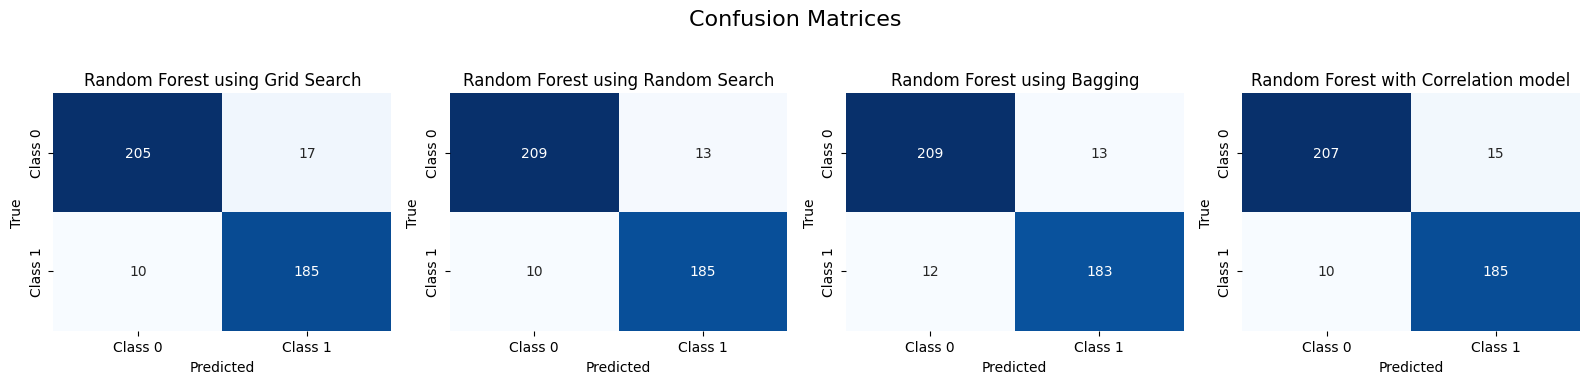

In [70]:
y_true_list_best.append(y_test)
y_pred_list_best.append(y_pred_rf)
model_names_best.append("Random Forest with Correlation model")
plot_confusion_matrices(y_true_list=y_true_list_best, y_pred_list=y_pred_list_best, model_names=model_names_best)

### Classification Performance Summary

In [71]:
results_best

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest with Correlation model,0.940048,0.939459,0.940575,0.939881
1,Random Forest using Grid Search,0.935252,0.934665,0.936071,0.935103
2,Random Forest using Random Search,0.944844,0.944341,0.945080,0.944661
3,Random Forest using Bagging,0.940048,0.939687,0.939951,0.939814
4,Balanced Random Forest,0.944844,0.944341,0.945080,0.944661


In [79]:
conf_matrix_rs = confusion_matrix(y_test, y_pred_rf_rs)
print(f"Confusion matrix for Random Forest using Random Search: {conf_matrix_rs}")
conf_matrix_balance = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for Balanced Random Forest: {conf_matrix_balance}")

Confusion matrix for Random Forest using Random Search: [[209  13]
 [ 10 185]]
Confusion matrix for Balanced Random Forest: [[209  13]
 [ 10 185]]


На основі додаткових результатів дослідження, можна зробити такі висновки щодо покращень продуктивності моделей Random Forest:

## Покращення базової моделі Random Forest
Random Forest Base Model спочатку показала точність 91.37% з precision 91.47%, recall 91.21%, та F1-score 91.31%. Це слугує відправною точкою для подальших покращень.

## Вплив кореляції
Random Forest with Correlation model покращила показники базової моделі, досягнувши точності 94.00%. Це вказує на те, що врахування кореляції між ознаками може значно підвищити ефективність моделі, покращуючи її здатність до узагальнення та зниження помилок.

## Додаткові покращення
Balanced Random Forest та Random Forest using Random Search продемонстрували подальші покращення, досягнувши точності 94.48%. Обидва підходи показали аналогічні високі значення precision (94.43%), recall (94.51%), та F1-score (94.47%). Це підкреслює ефективність використання балансування класів та випадкового пошуку гіперпараметрів для підвищення продуктивності моделі.

## Порівняння методів покращення

Random Search та балансування класів показали однакові результати у підвищенні точності та інших метрик, обидва забезпечуючи покращену матрицю помилок `[[209, 13], [10, 185]]`. Це свідчить про високу точність класифікації та мінімізацію помилок. Особливо важливо зазначити, що балансування класів є ефективною стратегією в умовах дисбалансу класів, підвищуючи справедливість і точність моделі.

Grid Search та Bagging дали менш виражені покращення порівняно з Random Search та балансуванням, але все ж залишаються корисними методами для оптимізації моделі.

## Висновок
Таким чином, врахування кореляції ознак у моделі Random Forest вже покращує її продуктивність порівняно з базовою моделлю. Однак використання методів, таких як Random Search та балансування класів, дозволяє досягти ще вищих результатів, роблячи модель більш точною та надійною для завдань прогнозування.